In [1]:
import numpy as np

In [23]:
#let's model our neurons / activation functions as a sigmoid function

In [24]:
def sigmoid(x):
    """logistic function.

    takes in a single number, and squishes it
    between 0 and 1.
    """

    return 1 / (1 + np.exp(-x))


In [25]:
def feed_forward(X, weights):

    '''
    1. Calculate the dot product of X
    (shape of (50,3))
    and the weights of the first layer
    (shape of (3, 2))
    this results in an output shape of (50, 2)
    '''

    # (N, 3) * (3, 2) -> (N, 2)
    step1 = np.dot(X, weights[0])

    """
    2. Apply the sigmoid function on the result
    (applying the sigmoid function on a 50x2 matrix outputs the same shape
    """

    # (N, 2) -> (N, 2)
    step2 = sigmoid(step1)

    """
    3. Append an extra 1 for the bias to the result
    (this results in a 50x3 matrix).
    """
    #(N, 2) -> (N, 3)

    step3 = np.hstack([step2, np.ones((step2.shape[0], 1))])


    """
    4. Calculate the dot product of X (from step 3)
    (shape of (50, 3))
    and the weights of the second layer
    (shape of (3, 1)). This results in an output shape of (50, 1)
    """
    # (N, 3) * (3, 1) -> (N, 1)
    step4 = np.dot(step3, weights[1])


    """
    5. Apply the sigmoid function on the result.
    """
    # (N, 1) -> (N, 1)
    step5 = sigmoid(step4)


    """
    6. Return all intermediate results (i.e. anything that is outputted
       by an activation function).
    """


    return step2, step5

In [26]:
def log_loss(ytrue, ypred):
    loss = - (ytrue * np.log(ypred) + (1 - ytrue) * np.log(1 - ypred))
    return loss


In [326]:
def backprop(weights,
             output1,
             output2,
             ytrue,
             X_input,
             LR_O,
             LR_H):
    #separate learning rates for outer and inner weights.

    wH = weights[0]
    wO = weights[1]

    '''EQUATION A:'''
    ytrue = ytrue.reshape(-1, 1)
    error = (output2 - ytrue) * log_loss(ytrue, output2)

    '''EQUATION B:'''
    sig_deriv = output2 * ( 1 - output2)
    #derivative of the sigmoid function with respect to the
    #hidden output * weights
    y_grad = sig_deriv * error

    '''EQUATION C:'''
    hidden_out_with_bias = np.hstack([output1,np.ones((output1.shape[0] ,1))])
    #don't forget the bias!
    delta_wo = np.dot(-y_grad.transpose(), hidden_out_with_bias ) * LR_O

    #and finally, old weights + delta weights -> new weights!
    wO_new = wO + delta_wo.transpose()

    '''EQUATION D:'''
    sig_deriv_2 = output1 * ( 1 - output1)
    H_grad = sig_deriv_2  * np.dot(y_grad , wO[:2].transpose())
    #exclude the bias (3rd column) of the outer weights,
    #since it is not backpropagated!

    '''EQUATION E:'''
    delta_wH = np.dot(-H_grad.transpose(), X_input) * LR_H
    wH_new = wH + delta_wH.transpose()
    #old weights + delta weights -> new weights!

    return wH_new, wO_new

In [486]:
def get_accuracy(ypred,ytrue):
    acc = sum(ytrue.flatten() == ypred.flatten().round().astype(np.int64))
    return acc/len(ytrue)

In [28]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=50, noise=0.2, random_state=42)
X = np.hstack([X, np.ones((X.shape[0], 1 ))])
ytrue = y.reshape(-1, 1)

In [ ]:
from tensorflow.keras.utils import to_categorical

to_categorical(ytra)

Final Loss: 17.56
Final Accuracy: 0.9


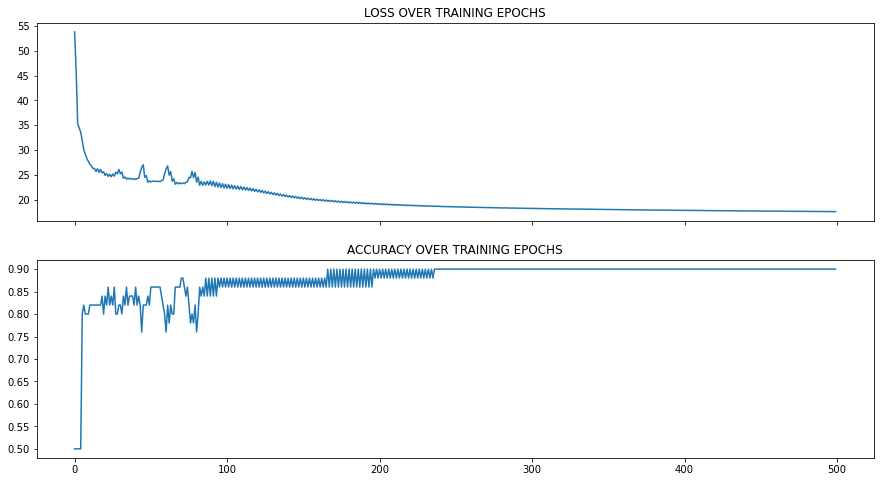

In [766]:
hidden_weights = np.random.normal(loc=0.0, scale=1.0, size=(3, 2))   # 3 inputs feeding into 2 neurons
outer_weights = np.random.normal(loc=0.0, scale=1.0, size=(3, 1)) # 3 inputs feeding into 1 neuron
weights = [hidden_weights, outer_weights]

ACC_VEC = []
LOSS_VEC = []
LR_O = 0.3
LR_H = 8

for i in range(500):
    out1, out2 = feed_forward(X, weights)
    ACC_VEC.append(get_accuracy(out2,y))
    LOSS_VEC.append(sum(log_loss(ytrue, out2))[0])
    new_weights = backprop(weights, out1, out2, ytrue, X, LR_O, LR_H)
    weights = new_weights

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 8))
ax1.plot(LOSS_VEC)
ax1.set_title('LOSS OVER TRAINING EPOCHS')
ax2.plot(ACC_VEC)
ax2 = ax2.set_title('ACCURACY OVER TRAINING EPOCHS')

print(f"Final Loss: {round(LOSS_VEC[-1:][0],2)}")
print(f"Final Accuracy: {ACC_VEC[-1:][0]}")